# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic

* Import Libraries and read the Data
* Explore the Data
* Data Visualization
* Data Cleaning
* Training Models
* Testing

# 1. Import Libraries and read the Data
Import several Python libraries such ass pandas, numpy, matplotlib and seaborn.

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# import train and test CSV files
train_df = pd.read_csv('/Users/ledat/Downloads/train.csv')
test_df = pd.read_csv('/Users/ledat/Downloads/test.csv')

# 2. Explore the Data
Take a look at the features in the dataset

In [3]:
# get a list of all the features in the dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# see the sample of the dataset to get an idea of the variables
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Numerical Features:** Age (Continuous), SibSp (Discrete), Parch (Discrete), Fare (Continuous)
* **Categorical Features:** Survived, Pclass, Sex, Embarked
* **Alphanumeric Features:** Ticket, Cabin

In [5]:
# check data types for each features
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# take a look at the training data
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nenkoff, Mr. Christo",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# check how many missing values of each feature
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Some Observations**
* There are 891 passengers in our training set
* The Age feature is missing 19.8% of its values. This feature is important to survival, so we need to fill these gaps later.
* The Cabin feature is missing a lot, 77.1% of its values. So much is missing so we will drop this feature.
* The Embarked feature miss only 2 values. So it doesn't matter.

**Some Predictions**
* Pclass: Higher class are more likely to survive.
* Sex: Female are more likely to survive.
* Age: Young children are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.

# 3. Data Visualization
Visualize our data to check if our predictions were accurate.

### Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


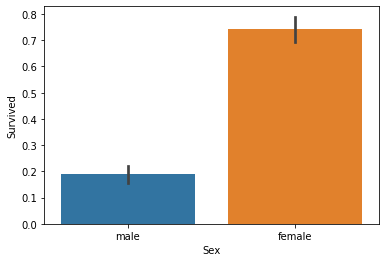

In [8]:
# draw bar plot of survival by Sex
sns.barplot(x="Sex", y="Survived", data=train_df)

# print percentages of females and males that survived
print("Percentage of females who survived:", train_df['Survived'][train_df['Sex']=='female'].value_counts(normalize=True)[1]*100)
print("Percentage of males who survived:", train_df['Survived'][train_df['Sex']=='male'].value_counts(normalize=True)[1]*100)

### Pclass Feature

In [9]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


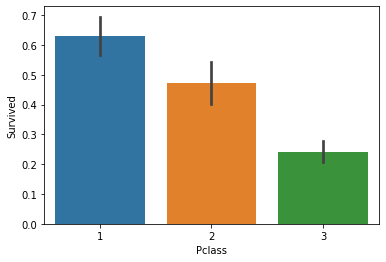

In [10]:
# draw bar plot of survival by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)

# print percentages of each Pclass that survived
print('Percentage of Pclass 1 who survived:', train_df['Survived'][train_df['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass 2 who survived:', train_df['Survived'][train_df['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass 3 who survived:', train_df['Survived'][train_df['Pclass']==3].value_counts(normalize=True)[1]*100)

### Age Feature

Because Age feature is continuous numeric feature, we need to sort these to group.
Since it missing values contains, we sort also these values to a group. 

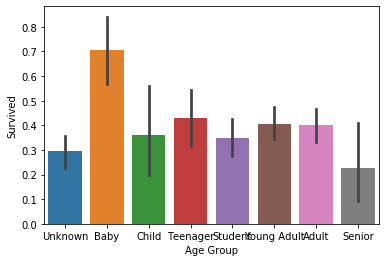

In [11]:
# sort missing values of Age features to a group
train_df['Age'] = train_df['Age'].fillna(-0.5)
test_df['Age'] = test_df['Age'].fillna(-0.5)

# sort Age features to groups
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['Age Group'] = pd.cut(train_df['Age'], bins, labels=labels)
test_df['Age Group'] = pd.cut(test_df['Age'], bins, labels=labels)

# draw bar plot of survival by Age
sns.barplot(x='Age Group', y='Survived', data = train_df)

We can see baby are more likely to survive than any other age group.

### SibSp Feature

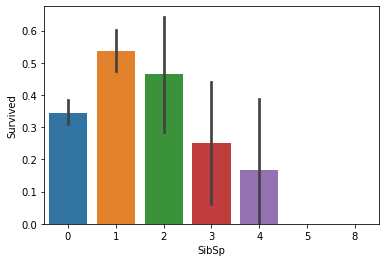

In [12]:
# draw bar plot of survival by SibSp
sns.barplot(x='SibSp', y='Survived', data=train_df)

### Parch Feature

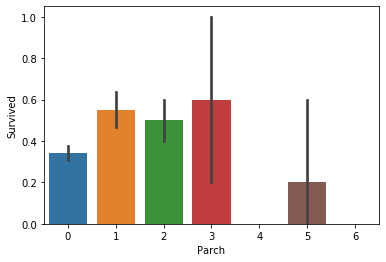

In [13]:
# draw bar plot of survival by Parch
sns.barplot(x='Parch', y='Survived', data=train_df)

### Embarked Feature

In [14]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Percentage of people imported from S that survived: 33.69565217391305
Percentage of people imported from C that survived: 55.35714285714286
Percentage of people imported from Q that survived: 38.961038961038966


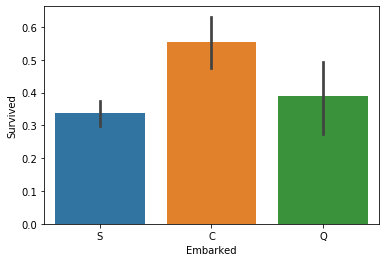

In [15]:
# draw bar plot of survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=train_df)

# Percentage of people aboarded from Embarkations that survived
print('Percentage of people imported from S that survived:', train_df['Survived'][train_df['Embarked']=='S'].value_counts(normalize=True)[1]*100)
print('Percentage of people imported from C that survived:', train_df['Survived'][train_df['Embarked']=='C'].value_counts(normalize=True)[1]*100)
print('Percentage of people imported from Q that survived:', train_df['Survived'][train_df['Embarked']=='Q'].value_counts(normalize=True)[1]*100)

### Cabin Feature

Percentage of people have Cabin recorded that survived: 66.66666666666666
Percentage of people don't have Cabin recorded that survived: 29.985443959243085


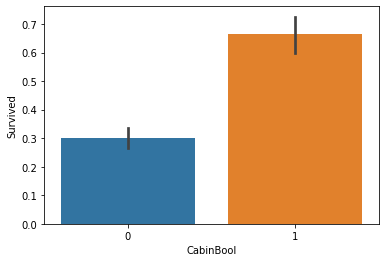

In [16]:
train_df['CabinBool'] = train_df['Cabin'].notnull().astype(int)

# percentage of survival by CabinBool:
print('Percentage of people have Cabin recorded that survived:', train_df['Survived'][train_df['CabinBool']==1].value_counts(normalize=True)[1]*100)
print('Percentage of people don\'t have Cabin recorded that survived:', train_df['Survived'][train_df['CabinBool']==0].value_counts(normalize=True)[1]*100)

# draw bar plot of survival by CabinBool:
sns.barplot(x='CabinBool', y='Survived', data=train_df)

People with a recorded Cabin number are infact more likely to survive.

# 4. Data Cleaning

Let's clean our data to account for missing values and unnecessary information.

### Looking at the Test Data

In [17]:
# take a look at test data
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Dennis, Mr. William",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


* There are total of 418 passengers.
* Fare feature is missing 1 value.
* Age feature is missing 20.5% of values. We need to fill that.

### Cabin Feature

In [18]:
# drop cabin feature.
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

### Ticket Feature

In [19]:
# drop ticket feature.
train_df = train_df.drop(labels = 'Ticket', axis = 1)
test_df = test_df.drop(labels = 'Ticket', axis = 1)

### Embarked Feature

In [20]:
# take a look at the Embarked feature
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# since majority of people embarked in Southampton (S), we'll fill in the missing values with S
train_df.Embarked = train_df.Embarked.fillna('S')

### Age Feature

We'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [22]:
# create a combined group of both datasets
combine_df = [train_df, test_df]

# extract a title for each Name in the train and the test datasets
for dataset in combine_df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
# replace various titles with more common names
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


In [24]:
# map each of the title groups to a numerical value
title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Royal': 5, 'Rare': 6}
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [25]:
# fill missing age with mode age group for each title
mr_age = train_df[train_df["Title"] == 1]["Age Group"].mode() #Young Adult
miss_age = train_df[train_df["Title"] == 2]["Age Group"].mode() #Student
mrs_age = train_df[train_df["Title"] == 3]["Age Group"].mode() #Adult
master_age = train_df[train_df["Title"] == 4]["Age Group"].mode() #Baby
royal_age = train_df[train_df["Title"] == 5]["Age Group"].mode() #Adult
rare_age = train_df[train_df["Title"] == 6]["Age Group"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_df["Age Group"])):
    if train_df["Age Group"][x] == "Unknown":
        train_df["Age Group"][x] = age_title_mapping[train_df["Title"][x]]

for x in range(len(test_df["Age Group"])):
    if test_df["Age Group"][x] == "Unknown":
        test_df["Age Group"][x] = age_title_mapping[test_df["Title"][x]]

We have filled the missing value in Age value. Now it's time to map each age group to numerical value.

In [26]:
# map each Age value to numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['Age Group'] = train_df['Age Group'].map(age_mapping)
test_df['Age Group'] = test_df['Age Group'].map(age_mapping)

train_df.head()

#dropping the Age feature for now
train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1


### Name Feature
We can also drop the name feature now as it's not important anymore.

In [28]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### Sex Feature

In [29]:
# map sex values to numerical values
sex_mapping = {'male':0, 'female':1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


### Embarked Feature

In [30]:
# map embarked values to numerical values
embarked_mapping = {'S':1, 'C':2, 'Q':3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age Group,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [32]:
#map Fare values into groups of numerical values
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [34]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age Group,Title,FareBand
0,892,3,0,0,0,3,5.0,1.0,1
1,893,3,1,1,0,1,6.0,3.0,1
2,894,2,0,0,0,3,7.0,1.0,2
3,895,3,0,0,0,1,5.0,1.0,2
4,896,3,1,1,1,1,4.0,3.0,2


# 5. Training Models


We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [35]:
from sklearn.model_selection import train_test_split

predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Now we will be testing the following models with the training data:

* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [36]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [37]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [38]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.22


In [39]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [40]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.66


In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.73


In [43]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

77.66


In [44]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

76.65


In [45]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


Now we will compare the accuracies of each model!

In [46]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)


,Model,Score
9,Gradient Boosting Classifier,84.77
3,Random Forest,81.73
0,Support Vector Machines,81.22
7,Decision Tree,80.20
2,Logistic Regression,79.19
4,Naive Bayes,78.68
6,Linear SVC,78.17
1,KNN,77.66
5,Perceptron,77.66
8,Stochastic Gradient Descent,76.65


**Gradient Boosting Classifier** has the highest accuracy.

# 6. Testing

In [56]:
#set ids as PassengerId and predict survival 
ids = test_df['PassengerId']
predictions = gbk.predict(test_df.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('/Users/ledat/Downloads/submission.csv', index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').